# NETFLIX DATA ANALYSIS

Netflix is a fast growing application with its popularity, shows and content.Personally being a big fan of Netfix shows , i thought this would be a intresting data set to work on.I got the data set from kaggle.This dataset consits on movies and tvshows available in Netflix. In this notebook we are going to load and read the data using pandas, do the cleaning ofthe data, and analyze thedata using diffrent parameters, lastly we a going to visually reprent data using matplotlib and seaborn.

In [7]:
project_name = "Netflix Data Analysis" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project="nelflix-data-analysis",files=["netflix_titles.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "niharika291997/nelflix-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/niharika291997/nelflix-data-analysis


'https://jovian.ml/niharika291997/nelflix-data-analysis'

## Data Preparation and Cleaning

As the data set contain vast ammount of information , we are going to import the libraries we will use in the notebook and read the data m, handle the null values and understand the data so that we can analyze the data further.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
## here we are reading the csv file using read.csv() function from pandas,this funcion reads the data from the csv and stores in the form of a data frame
netflix_df=pd.read_csv('netflix_titles.csv')

## lets call the type funtion just to confirm that the data is stored as a data frame
type(netflix_df)

pandas.core.frame.DataFrame

In [13]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [14]:
##Lets call the info() function to get the basic information of the data frame like total number of columns with nam ,data types etc.

netflix_df.info()

## .shape gives the tuple of the rows and the columns 

netflix_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


(6234, 12)

In [15]:
## we use .columns to get the list of columns values in a data frame

netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
## this is just a simple representation of how we can retreive data from a data frame

netflix_df['director']

## we can pass a list of columns in[]

netflix_df[['title','director']]


,title,director
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby"
1,Jandino: Whatever it Takes,NaN
2,Transformers Prime,NaN
3,Transformers: Robots in Disguise,NaN
4,#realityhigh,Fernando Lebrija
...,...,...
6229,Red vs. Blue,NaN
6230,Maron,NaN
6231,Little Baby Bum: Nursery Rhyme Friends,NaN
6232,A Young Doctor's Notebook and Other Stories,NaN


In [17]:
## using head  function to retreive the data

netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [18]:
## using tail function to retreive the data

netflix_df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6225,70153412,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,70243132,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,80005756,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,80159925,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [19]:
## let find the nunique values in the data frame,it ignores the nan values


netflix_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [20]:
## We check for Null values using isnull() function

netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

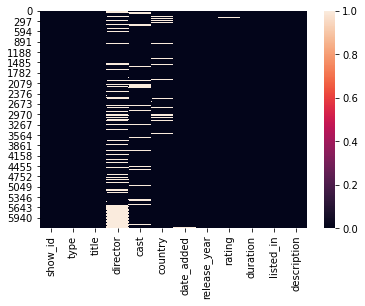

In [21]:
## this is the visual representation of above

sns.heatmap(netflix_df.isnull())

In [22]:
## we see that there are null values in the columns director,cast,country,date added and rating.Lets deal with these . 
## creating copy so that the original is intact

nf_df=netflix_df.copy()

In [23]:
nf_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [24]:
## as the director and cast are not going to a part of our visualization i have decided to drop the columns, 
nf_df=netflix_df.copy()

nf_df.drop(['director','cast','date_added'],axis=1,inplace=True)

nf_df

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [25]:
# Now we are left with null values in country ,date_added and rating . for country we can replace NAN with United states as Netflix is a US based firm.
## replace() functon is used here to 
nf_df['country'].replace(np.NaN,'United States',inplace=True)

nf_df

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [26]:
## Now we are left with  the rating column which has just 10 null values wen either drop them or replace them
nf_df['rating']


0          TV-PG
1          TV-MA
2       TV-Y7-FV
3          TV-Y7
4          TV-14
          ...   
6229          NR
6230       TV-MA
6231         NaN
6232       TV-MA
6233       TV-14
Name: rating, Length: 6234, dtype: object

In [27]:
## Because it is just 10 values lets just replace it with most common rating TV-MA
nf_df['rating'].replace(np.NaN,'TV-MA',inplace=True)

nf_df


,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [28]:
## the output should returm all o in all columns as we handled all null values now
nf_df.isnull().sum()

show_id         0
type            0
title           0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [29]:
nf_df

,show_id,type,title,country,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "niharika291997/nelflix-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/niharika291997/nelflix-data-analysis


'https://jovian.ml/niharika291997/nelflix-data-analysis'

## Exploratory Analysis and Visualization

**TODO** - In this section we ask interesting questions to analyze the data and draw some conclusions based on the analysis.



Q1:What type of content does Netflix have more Movies or TV Shows

In [32]:
# Lets find how may tv shows and movies are available in the dataset
##value_count() Return a Series containing counts of unique values.

nf_df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

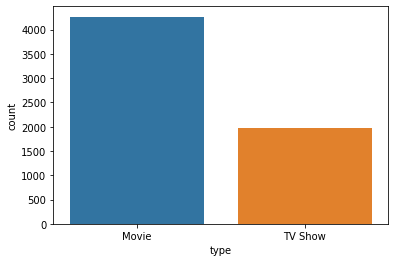

In [33]:
## Visual representation of the content

sns.countplot(x='type', data=nf_df);

Q2:What are the countries which have most content in the data frame.

In [34]:
## lets get the countries with most content, we use groupby() ,count() and sort_values() to get the result
## Groupby() This can be used to group large amounts of data and compute operations on these groups.
## count() counts the number of values in each column.
## sort_values() Sort by the values along either axis

topcontent_countries = nf_df.groupby('country').count().sort_values('type',ascending=False)

topcontent_countries.reset_index(inplace=True)

topcontent_countries


,country,show_id,type,title,release_year,rating,duration,listed_in,description
0,United States,2508,2508,2508,2508,2508,2508,2508,2508
1,India,777,777,777,777,777,777,777,777
2,United Kingdom,348,348,348,348,348,348,348,348
3,Japan,176,176,176,176,176,176,176,176
4,Canada,141,141,141,141,141,141,141,141
...,...,...,...,...,...,...,...,...,...
549,"Netherlands, Germany, Italy, Canada",1,1,1,1,1,1,1,1
550,"Netherlands, Denmark, South Africa",1,1,1,1,1,1,1,1
551,"Netherlands, Denmark, France, Germany",1,1,1,1,1,1,1,1
552,"Netherlands, Belgium, United Kingdom, United S...",1,1,1,1,1,1,1,1


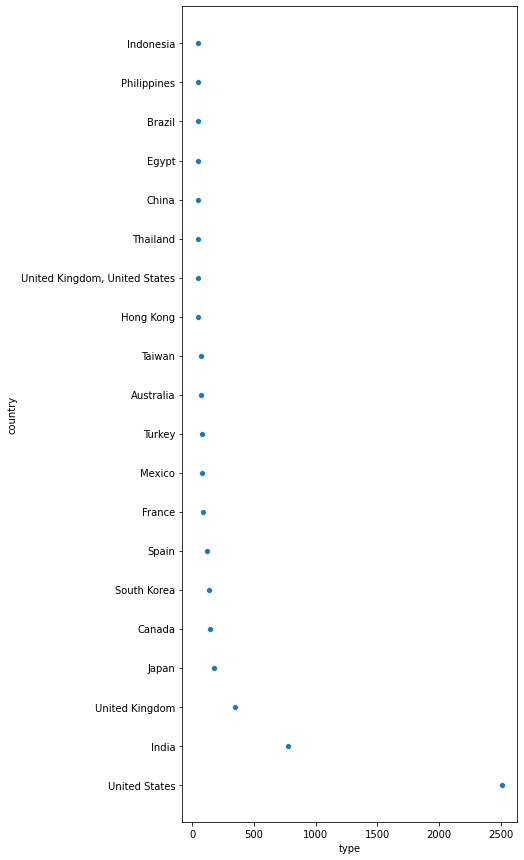

In [35]:
plt.figure(figsize=(6, 15))

sns.scatterplot(topcontent_countries.type,topcontent_countries.country.head(20));

Q3 What are the most common ratings of the shows in the dataset

,rating,Nbr
0,TV-MA,2037
1,TV-14,1698
2,TV-PG,701
3,R,508
4,PG-13,286
5,NR,218
6,PG,184
7,TV-Y7,169
8,TV-G,149
9,TV-Y,143


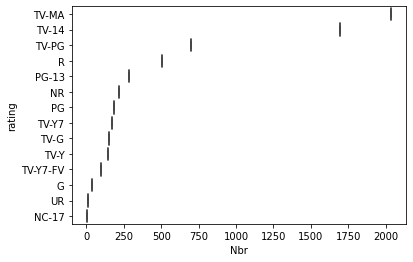

In [36]:
# below is the depiction of the most common ratings which is TV_MA in this case

nf_df_rating = nf_df['rating'].value_counts()
nf_df_rating = pd.DataFrame(nf_df_rating).reset_index()
nf_df_rating.columns = ['rating','Nbr']
sns.boxplot(y = 'rating',x = 'Nbr', data=nf_df_rating)
nf_df_rating

Q4:What are the top 10 genres ?

In [37]:
top_listed_in=nf_df["listed_in"].value_counts()
top_listed_in.head(10)

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            159
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Comedies, International Movies                      120
Children & Family Movies                            120
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

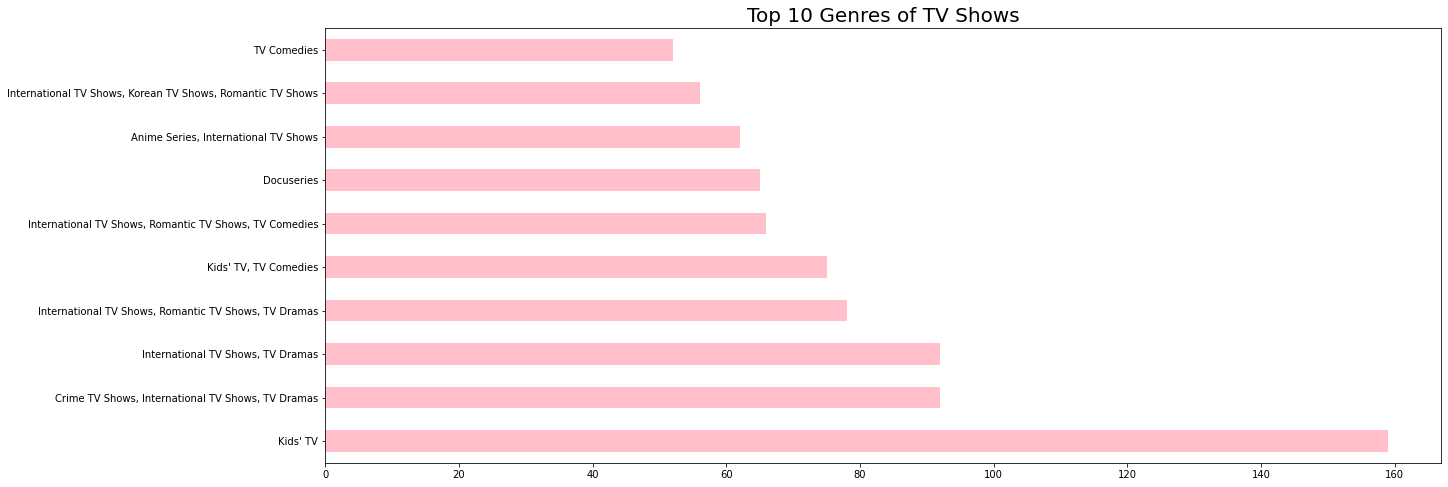

In [38]:
## Visualization of top 10 geners of tv shows
plt.figure(figsize=(20,8))
nf_df[nf_df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="pink")
plt.title("Top 10 Genres of TV Shows",size=20)

Below is visual representation of complete cleaned data set

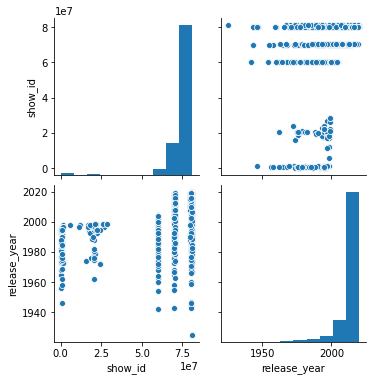

In [39]:
## A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

sns.pairplot(nf_df);

Q5 How do we find the corelation and how to visually represent it

In [40]:
nf_df.corr()

,show_id,release_year
show_id,1.000000,0.566577
release_year,0.566577,1.000000


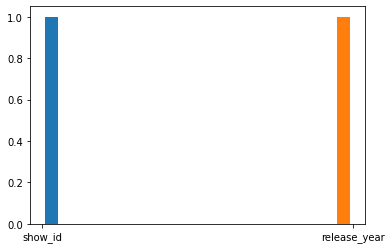

In [41]:
plt.hist(nf_df.corr());

In [42]:
import jovian

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "niharika291997/nelflix-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/niharika291997/nelflix-data-analysis


'https://jovian.ml/niharika291997/nelflix-data-analysis'

## Inferences and Conclusion

1) In this note book i have tried to analyze various trends on Netflix.

2) As iam a binge watcher of netflix i choose this dataset from kaggle.com.

3) While working on this project, i researched lot of information regarding pandas and plots.

4) After the analysis we concluded that netflix has more movies than TV shows, also majority of its content is rated MA.The top content countryis United States.

5) While doing this project i have realized that there is lot more to learn, iam excited to move forward in this journey of becoming a Data Analyst/Scientist.

6) I have refered to the pandas notebook and visulization notes from zero to pandas project to finish this project, i have done lot research as well to the learn th concepts of pandas and numpy.



Let us save and upload our work to Jovian before continuing.

In [44]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References and Future Work

1) https://www.kaggle.com/shivamb/netflix-shows(link to the dataset)

2) Numerical computing with Numpy: https://jovian.ml/aakashns/python-numerical-computing-with-numpy

3) Analyzing tabular data with Pandas: https://jovian.ml/aakashns/python-pandas-data-analysis

4) Matplotlib & Seaborn tutorial: https://jovian.ml/aakashns/python-matplotlib-data-visualization

5) Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

6) Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

7) Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

Iam excited to share that iam going to work on on couple of adhoc projects my next project i chose is Stack overflow survey results.

In [ ]:
import jovian

In [ ]:
jovian.commit()